## Explore Data

In [0]:
import pandas as pd

accident = pd.read_csv("road-accidents.csv", comment="#", sep="|")

rows_and_cols = accident.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

acc_info = accident.info()
print(acc_info)

accident.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


## Summary the data

       drvr_fatl_col_bmiles  ...  perc_fatl_1st_time
count             51.000000  ...            51.00000
mean              15.790196  ...            88.72549
std                4.122002  ...             6.96011
min                5.900000  ...            76.00000
25%               12.750000  ...            83.50000
50%               15.600000  ...            88.00000
75%               18.500000  ...            95.00000
max               23.900000  ...           100.00000

[8 rows x 4 columns]


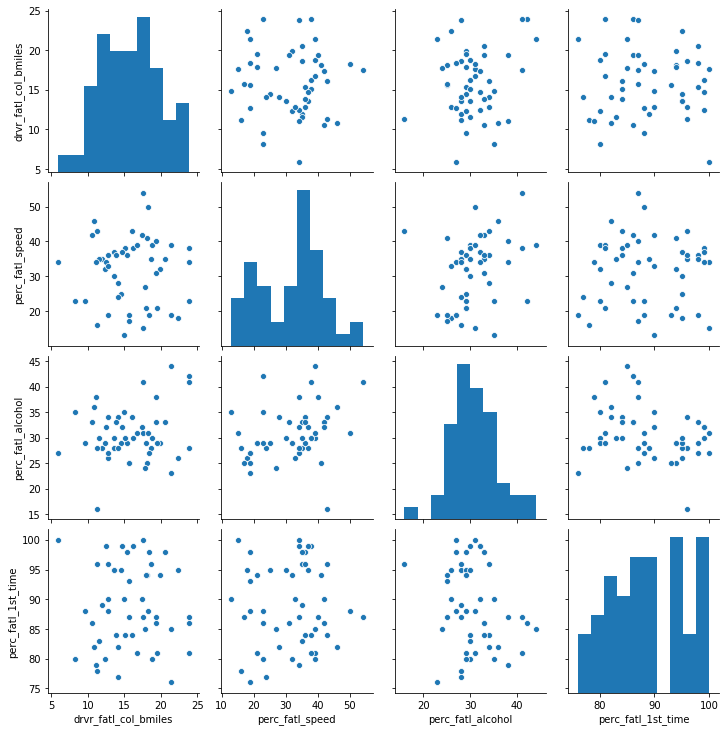

In [0]:
import seaborn as sns
%matplotlib inline

accident_desc = accident.describe()
print(accident_desc)

sns.pairplot(accident)

## Correlation

In [0]:
accident_corr = accident.corr()
print(accident_corr)

                      drvr_fatl_col_bmiles  ...  perc_fatl_1st_time
drvr_fatl_col_bmiles              1.000000  ...           -0.017942
perc_fatl_speed                  -0.029080  ...            0.014066
perc_fatl_alcohol                 0.199426  ...           -0.245455
perc_fatl_1st_time               -0.017942  ...            1.000000

[4 rows x 4 columns]


## Multivariate linear regression

In [0]:
from sklearn import linear_model

features = accident[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target = accident["drvr_fatl_col_bmiles"]

reg = linear_model.LinearRegression()

reg.fit(features, target)

fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

## PCA

The cumulative variance 0.7947


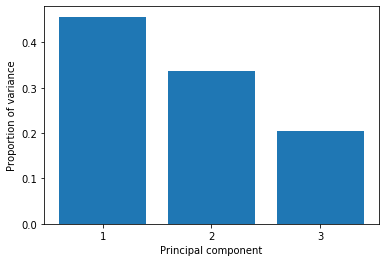

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA()

pca.fit(feat_scaled)

import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance')
plt.xticks([1, 2, 3])

two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance {}".format(
    round(two_first_comp_var_exp, 5)))

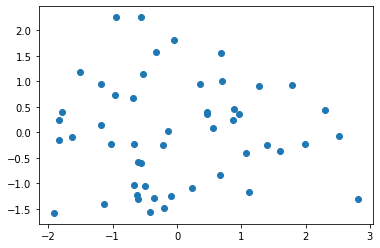

In [0]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(feat_scaled)

p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

plt.scatter(p_comp1,p_comp2)

## Find clusters 

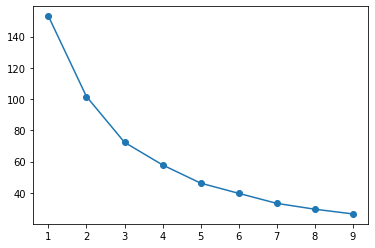

In [0]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(feat_scaled)
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias, marker='o')

## KMeans to visualize clusters in the PCA scatter plot

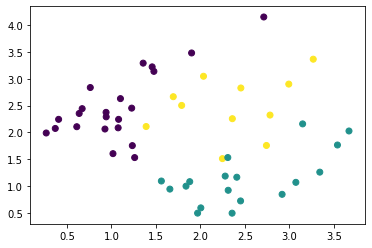

In [0]:
km = KMeans(n_clusters=3, random_state=8)

p_comps = km.fit_transform(feat_scaled)

plt.scatter(p_comps[:,0], p_comps[:,1], c=km.labels_)

##Visualize the different between the clusters

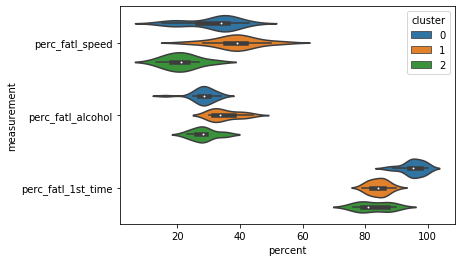

In [0]:
# Create a new column with the labels from the KMeans clustering
accident['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_acc = pd.melt(accident, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=features)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=melt_acc["percent"], y=melt_acc["measurement"], hue=melt_acc["cluster"])

## Compute the number of accidents

,count,mean,sum
cluster,,,
0,22,898.378595,19764.3291
1,18,911.406439,16405.3159
2,11,860.505945,9465.5654


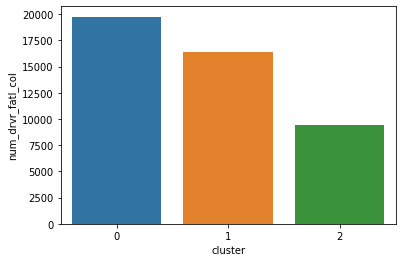

In [0]:
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

acc_miles = pd.merge(accident, miles_driven, on="state")

# Create a new column for the number of drivers involved in fatal accidents
acc_miles['num_drvr_fatl_col'] = acc_miles['drvr_fatl_col_bmiles']*acc_miles["million_miles_annually"]/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x=acc_miles["cluster"], y=acc_miles["num_drvr_fatl_col"], data=acc_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = acc_miles.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])
count_mean_sum

In [0]:
#cluster i have to choose
cluster_num = 1